## Exercise 5

### General Instructions

Build a cortical column of 400 $\mu m$ radius consisting of L1 inhibitory population (Htr3a) and L2/3-L6 excitatory and inhibitory populations of PV, SST, and Htr3a cells. Use the `NetworkBuilder` to create a network with 80% excitatory and 20% inhibitory neurons (up to 100 neurons total), and use `BioNet` to run the simulations. Record the extracellular potentials / local field potentials (LFPs) evoked by these neurons with a linear probe located at the center of the cortical column with 100 $\mu m$ inter-electrode distance and plot the results. Calculate the CSD from the LFPs and plot it as well. Use the `VND` to visualize the network and check synaptic connections. Evaluate the effect of basal and apical dendritic synapses on the LFP and CSD by removing them from the model and simulating the network responses when only one of them is included.

- Total number of neurons: 100
- Total number of external virtual neurons: 100
- Simulation time: 3 s
- Time step: 0.1 ms
- Stimulations start at 0.5 s and last for 2.5 s
- Poisson spike trains with a rate of 10 Hz

### 1. Build the network:
- To build the network, use the biophysically detailed neuron models provided in [node_models.json](node_models.json). It contains the spatial information to generate the location of the neurons within the cortical column, the population types per layer and the biophysical model representing each population with its associated morphology. Biophysical models and morphologies are available in [components/biophysical_neuron_templates](components/biophysical_neuron_templates) and [components/morphologies](components/morphologies), respectively.
- To facilitate the comparison across simulation types, build three different networks:
  - A network with all synapses (default).
  - A network with only basal dendritic synapses.
  - A network with only apical dendritic synapses.
- Synaptic models are included in [components/synaptic_models](components/synaptic_models).

#### 1.1 Create the nodes

1.1.1. Create internal nodes.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from bmtk.builder.networks import NetworkBuilder

[OSXLTC5747Y:27646] shmem: mmap: an error occurred while determining whether or not /var/folders/pr/_10c7kr546b1t7cf9z259z_40000gp/T//ompi.OSXLTC5747Y.502/jf.0/2883452928/sm_segment.OSXLTC5747Y.502.abde0000.0 could be created.


In [2]:
# L2/3 - 150 - 300
# L4 - 300 - 400
# L5 - 400 - 550
def get_coords(N, y_range, radius_min=0.0, radius_max=400.0):
    phi = 2.0 * np.pi * np.random.random([N])
    r = np.sqrt((radius_min**2 - radius_max**2) * np.random.random([N]) + radius_max**2)
    x = r * np.cos(phi)
    y = np.random.uniform(y_range[0], y_range[1], size=N)
    z = r * np.sin(phi)
    return x, y, z

In [3]:
cortcol_allsyns = NetworkBuilder("cortcol")
cortcol_basalsyns = NetworkBuilder("cortcol")
cortcol_apicalsyns = NetworkBuilder("cortcol")

In [4]:
for cortcol in [cortcol_allsyns, cortcol_basalsyns, cortcol_apicalsyns]:
    x, y, z = get_coords(20, y_range=[-300, -100])
    cortcol.add_nodes(
        N=20,
        # Reserved SONATA keywords used during simulation
        model_type="biophysical",
        model_template="ctdb:Biophys1.hoc",
        model_processing="aibs_perisomatic",
        dynamics_params="Scnn1a_485510712_params.json",
        morphology="Scnn1a_485510712_morphology.swc",
        # The x, y, z locations and orientations (in Euler angles) of each cell
        # Here, rotation around the pia-to-white-matter axis is randomized
        x=x,
        y=y,
        z=z,
        rotation_angle_xaxis=[0] * 20,
        rotation_angle_yaxis=np.random.uniform(0.0, 2 * np.pi, size=20),
        rotation_angle_zaxis=[3.646878266] * 20,
        tuning_angle=np.linspace(start=0.0, stop=360.0, num=20, endpoint=False),
        layer="L23",
        model_name="Scnn1a",
        ei="e",
    )

    x, y, z = get_coords(20, y_range=[-400, -300])
    cortcol.add_nodes(
        N=20,
        model_type="biophysical",
        model_template="ctdb:Biophys1.hoc",
        model_processing="aibs_perisomatic",
        dynamics_params="Scnn1a_485510712_params.json",
        morphology="Scnn1a_485510712_morphology.swc",
        # The x, y, z locations and orientations (in Euler angles) of each cell
        # Here, rotation around the pia-to-white-matter axis is randomized
        x=x,
        y=y,
        z=z,
        rotation_angle_xaxis=[0] * 20,
        rotation_angle_yaxis=np.random.uniform(0.0, 2 * np.pi, size=20),
        rotation_angle_zaxis=[3.646878266] * 20,
        tuning_angle=np.linspace(start=0.0, stop=360.0, num=20, endpoint=False),
        layer="L4",
        model_name="Scnn1a",
        ei="e",
    )

    x, y, z = get_coords(20, y_range=[-600, -400])
    cortcol.add_nodes(
        N=20,
        model_type="biophysical",
        model_template="ctdb:Biophys1.hoc",
        model_processing="aibs_perisomatic",
        dynamics_params="Scnn1a_485510712_params.json",
        morphology="Scnn1a_485510712_morphology.swc",
        x=x,
        y=y,
        z=z,
        rotation_angle_xaxis=[0] * 20,
        rotation_angle_yaxis=np.random.uniform(0.0, 2 * np.pi, size=20),
        rotation_angle_zaxis=[3.646878266] * 20,
        tuning_angle=np.linspace(start=0.0, stop=360.0, num=20, endpoint=False),
        layer="L5",
        model_name="Scnn1a",
        ei="e",
    )

    x, y, z = get_coords(20, y_range=[-600, -100])
    cortcol.add_nodes(
        N=20,
        model_type="biophysical",
        model_template="ctdb:Biophys1.hoc",
        model_processing="aibs_perisomatic",
        dynamics_params="Pvalb_473862421_params.json",
        morphology="Pvalb_473862421_morphology.swc",
        x=x,
        y=y,
        z=z,
        rotation_angle_xaxis=np.random.uniform(0.0, 2 * np.pi, size=20),
        rotation_angle_yaxis=np.random.uniform(0.0, 2 * np.pi, size=20),
        rotation_angle_zaxis=[2.539551891] * 20,
        model_name="Pvalb",
        ei="i",
    )

# Add synapses to the network
cortcol_allsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["somatic", "basal", "apical"],
    distance_range=[2.0, 1.0e20],
)

cortcol_allsyns.add_edges(
    # Exc --> Inh connections
    source={"ei": "e"},
    target={"ei": "i"},
    connection_rule=lambda *_: np.random.randint(1, 10),
    dynamics_params="AMPA_ExcToInh.json",
    model_template="Exp2Syn",
    syn_weight=0.002,
    delay=3.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 1.0e20],
)

cortcol_allsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["somatic", "basal", "apical"],
    distance_range=[0.0, 50.0],
)

# ---- Basal synapses ----
cortcol_basalsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["somatic", "basal"],
    distance_range=[2.0, 1.0e20],
)

cortcol_basalsyns.add_edges(
    # Exc --> Inh connections
    source={"ei": "e"},
    target={"ei": "i"},
    connection_rule=lambda *_: np.random.randint(1, 10),
    dynamics_params="AMPA_ExcToInh.json",
    model_template="Exp2Syn",
    syn_weight=0.002,
    delay=3.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 1.0e20],
)

cortcol_basalsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 50.0],
)

# ---- Apical synapses ----
cortcol_apicalsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["apical"],
    distance_range=[2.0, 1.0e20],
)
cortcol_apicalsyns.add_edges(
    # Exc --> Inh connections
    source={"ei": "e"},
    target={"ei": "i"},
    connection_rule=lambda *_: np.random.randint(1, 10),
    dynamics_params="AMPA_ExcToInh.json",
    model_template="Exp2Syn",
    syn_weight=0.002,
    delay=3.0,
    target_sections=["apical"],
    distance_range=[0.0, 1.0e20],
)
cortcol_apicalsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["apical"],
    distance_range=[0.0, 50.0],
)

# # Save the networks to disk
# cortcol_allsyns.build()
# cortcol_allsyns.save(output_dir="network_allsynapses")

# cortcol_basalsyns.build()
# cortcol_basalsyns.save(output_dir="network_basalsynapses")

# cortcol_apicalsyns.build()
# cortcol_apicalsyns.save(output_dir="network_apicalsynapses")

1.1.2. Create external nodes - virtual cells that provide inputs to the network.

In [5]:
np.random.seed(42)
external = NetworkBuilder("external")
# external.add_nodes(
#     N=100,
#     pop_name="external",
#     x=np.random.uniform(-40.0, 40.0, size=100),
#     y=np.random.uniform(-40.0, 40.0, size=100),
#     model_type="virtual",
#     ei="e",
# )
external.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tOFF_TF15",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tOFF",
    dynamics_params="tOFF_TF15.json",
)
external.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tON",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tON",
    dynamics_params="tON_TF8.json",
)

external_basalsyns = NetworkBuilder("external")
# external_basalsyns.add_nodes(
#     N=100,
#     pop_name="external",
#     x=np.random.uniform(-40.0, 40.0, size=100),
#     y=np.random.uniform(-40.0, 40.0, size=100),
#     model_type="virtual",
#     ei="e",
# )
external_basalsyns.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tOFF_TF15",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tOFF",
    dynamics_params="tOFF_TF15.json",
)
external_basalsyns.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tON",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tON",
    dynamics_params="tON_TF8.json",
)

external_apicalsyns = NetworkBuilder("external")
# external_apicalsyns.add_nodes(
#     N=100,
#     pop_name="external",
#     x=np.random.uniform(-40.0, 40.0, size=100),
#     y=np.random.uniform(-40.0, 40.0, size=100),
#     model_type="virtual",
#     ei="e",
# )
external_apicalsyns.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tOFF_TF15",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tOFF",
    dynamics_params="tOFF_TF15.json",
)
external_apicalsyns.add_nodes(
    N=50,
    model_type="virtual",
    model_template="lgnmodel:tON",
    x=np.random.uniform(0.0, 240.0, 50),
    y=np.random.uniform(0.0, 120.0, 50),
    spatial_size=1.0,
    pop_name="tON",
    dynamics_params="tON_TF8.json",
)

#### 1.2 Create the edges

1.2.1. Internal edges - synaptic connections between neurons in the network.

Cases:
- All synapses
- Basal dendritic synapses only
- Apical dendritic synapses only

Basal & apical synapses

In [6]:
cortcol_allsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["somatic", "basal", "apical"],
    distance_range=[2.0, 1.0e20],
)

cortcol_allsyns.add_edges(
    # Exc --> Inh connections
    source={"ei": "e"},
    target={"ei": "i"},
    connection_rule=lambda *_: np.random.randint(1, 10),
    dynamics_params="AMPA_ExcToInh.json",
    model_template="Exp2Syn",
    syn_weight=0.002,
    delay=3.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 1.0e20],
)

cortcol_allsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["somatic", "basal", "apical"],
    distance_range=[0.0, 50.0],
)

cortcol_allsyns.build()
cortcol_allsyns.save(output_dir="network_allsynapses")

Only basal synapses

In [7]:
cortcol_basalsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["somatic", "basal"],
    distance_range=[2.0, 1.0e20],
)

cortcol_basalsyns.add_edges(
    # Exc --> Inh connections
    source={"ei": "e"},
    target={"ei": "i"},
    connection_rule=lambda *_: np.random.randint(1, 10),
    dynamics_params="AMPA_ExcToInh.json",
    model_template="Exp2Syn",
    syn_weight=0.002,
    delay=3.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 1.0e20],
)

cortcol_basalsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["somatic", "basal"],
    distance_range=[0.0, 50.0],
)

cortcol_basalsyns.build()
cortcol_basalsyns.save(output_dir="network_basalsynapses")

Only apical synapses

In [8]:
cortcol_apicalsyns.add_edges(
    source={"ei": "e"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(10, 15),
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    syn_weight=6.0e-03,
    delay=0.5,
    target_sections=["apical"],
    distance_range=[2.0, 1.0e20],
)

cortcol_apicalsyns.add_edges(
    # Inh --> Exc connections
    source={"ei": "i"},
    target={"ei": "e"},
    connection_rule=lambda *_: np.random.randint(0, 6),
    dynamics_params="GABA_InhToExc.json",
    model_template="Exp2Syn",
    syn_weight=0.0002,
    delay=2.0,
    target_sections=["apical"],
    distance_range=[0.0, 50.0],
)

cortcol_apicalsyns.build()
cortcol_apicalsyns.save(output_dir="network_apicalsynapses")

Add external nodes to the network:

In [12]:
from bmtk.builder.bionet.swc_reader import get_swc


def set_synapses(
    src, trg, section_names=("soma", "apical", "basal"), distance_range=(0.0, 1.0e20)
):
    trg_swc = get_swc(trg, morphology_dir="components/morphologies/", use_cache=True)

    sec_ids, seg_xs = trg_swc.choose_sections(
        section_names, distance_range, n_sections=1
    )
    sec_id, seg_x = sec_ids[0], seg_xs[0]
    # swc_id, swc_dist = trg_swc.get_swc_id(sec_id, seg_x)
    # coords = trg_swc.get_coords(sec_id, seg_x)

    return [sec_id, seg_x]

numprocs=1


In [13]:
# cm = external.add_edges(
#     target=cortcol_allsyns.nodes(ei="e", model_type="biophysical", layer="VisL4"),
#     source=external.nodes(),
#     connection_rule=20,
#     # iterator="one_to_all",
#     dynamics_params="AMPA_ExcToExc.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00041,
#     target_sections=["basal", "apical", "somatic"],
#     distance_range=[0.0, 50.0],
# )

# cm = external.add_edges(
#     target=cortcol_allsyns.nodes(ei="i", model_type="biophysical"),
#     source=external.nodes(),
#     connection_rule=10,
#     # iterator="one_to_all",
#     dynamics_params="AMPA_ExcToInh.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00095,
#     target_sections=["basal", "somatic"],
#     distance_range=[0.0, 1e20],
# )

cm = external.add_edges(
    source=external.nodes(),
    target=cortcol_allsyns.nodes(ei="e", layer="VisL4"),
    connection_rule=20,
    # iterator='one_to_all',
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    delay=2.0,
    syn_weight=0.00041,
    target_sections=["basal", "apical", "somatic"],
    distance_range=[0.0, 50.0],
)

external.save(output_dir="network_allsynapses")

del cm

Was not able to generate any edges using the "connection_rule". Not saving.


In [14]:
# cm = external_basalsyns.add_edges(
#     target=cortcol_basalsyns.nodes(ei="e", model_type="biophysical", layer="VisL4"),
#     source=external_basalsyns.nodes(),
#     connection_rule=20,
#     # iterator="one_to_all",
#     dynamics_params="AMPA_ExcToExc.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00041,
#     target_sections=["basal", "somatic"],
#     distance_range=[0.0, 50.0],
# )

# cm = external_basalsyns.add_edges(
#     target=cortcol_basalsyns.nodes(ei="i", model_type="biophysical"),
#     source=external_basalsyns.nodes(),
#     connection_rule=10,
#     # iterator="one_to_all",
#     dynamics_params="AMPA_ExcToInh.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00095,
#     target_sections=["basal", "somatic"],
#     distance_range=[0.0, 1e20],
# )

cm = external_basalsyns.add_edges(
    source=external_basalsyns.nodes(),
    target=cortcol_basalsyns.nodes(ei="e", layer="VisL4"),
    connection_rule=20,
    # iterator='one_to_all',
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    delay=2.0,
    syn_weight=0.00041,
    target_sections=["basal", "apical", "somatic"],
    distance_range=[0.0, 50.0],
)

external_basalsyns.save(output_dir="network_basalsynapses")

del cm

Was not able to generate any edges using the "connection_rule". Not saving.


In [15]:
# cm = external_apicalsyns.add_edges(
#     target=cortcol_apicalsyns.nodes(ei="e", model_type="biophysical", layer="VisL4"),
#     source=external_apicalsyns.nodes(),
#     connection_rule=20,
#     # iterator="one_to_all",
#     dynamics_params="AMPA_ExcToExc.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00041,
#     target_sections=["apical"],  # , "somatic"
#     distance_range=[0.0, 50.0],
# )

# cm = external_apicalsyns.add_edges(
#     target=cortcol_apicalsyns.nodes(ei="i", model_type="biophysical"),
#     source=external_apicalsyns.nodes(),
#     connection_rule=10,
#     connection_params={
#         "dist_cutoff": 1e20,
#     },
#     iterator="one_to_all",
#     dynamics_params="AMPA_ExcToInh.json",
#     model_template="Exp2Syn",
#     delay=2.0,
#     syn_weight=0.00095,
#     target_sections=["apical"],  # , "somatic"
#     distance_range=[0.0, 1e20],
# )

cm = external_apicalsyns.add_edges(
    source=external_apicalsyns.nodes(),
    target=cortcol_apicalsyns.nodes(ei="e", layer="VisL4"),
    connection_rule=20,
    # iterator='one_to_all',
    dynamics_params="AMPA_ExcToExc.json",
    model_template="Exp2Syn",
    delay=2.0,
    syn_weight=0.00041,
    target_sections=["basal", "apical", "somatic"],
    distance_range=[0.0, 50.0],
)

external_apicalsyns.save(output_dir="network_apicalsynapses")

del cm

Was not able to generate any edges using the "connection_rule". Not saving.


### 2. Generate the simulation config.json file:
- The config.json file should include the following parameters:
  - duration: 3 seconds
  - dt: 0.1 ms
  - reports: add 'ecp' recordings to the `reports` section to record the LFPs.
      - `electrode_positions`: path to the csv file containing the electrode positions. File provided in [components/electrodes](components/electrodes).
  - input: use the external input created in step 1.1.2
  - output: save the simulation results in a folder named [outputs](outputs)

`Note`: You can use `config.lfp.json` file as a template. You can modify it to suit your simulation needs.

In [16]:
# Load the existing config file
with open("config.lfp.json", "r") as f:
    config = json.load(f)

# Create config for basal synapses
basal_config = config.copy()
basal_config["manifest"]["$NETWORK_DIR"] = "$BASE_DIR/network_basalsynapses"
basal_config["manifest"]["$OUTPUT_DIR"] = "$BASE_DIR/output_basalsynapses"

with open("config.lfp_basal.json", "w") as f:
    json.dump(basal_config, f, indent=2)


# Create config for apical synapses
apical_config = config.copy()
apical_config["manifest"]["$NETWORK_DIR"] = "$BASE_DIR/network_apicalsynapses"
apical_config["manifest"]["$OUTPUT_DIR"] = "$BASE_DIR/output_apicalsynapses"

with open("config.lfp_apical.json", "w") as f:
    json.dump(apical_config, f, indent=2)

print("Generated configuration files for basal and apical synapses simulations.")

Generated configuration files for basal and apical synapses simulations.


### 3. Run the simulation:
- Use `BioNet` to run the simulation with the generated config.json file. The simulation should be run for 3 seconds with a time step of 0.1 ms. The results should be saved in the outputs folder.
- Remember to compile the [./components/mechanisms](components/mechanisms) before running the simulation. You can do this by running the following command in the terminal:
```bash
! cd components/mechanisms && nrnivmodl modfiles
```

In [16]:
from bmtk.simulator import bionet

bionet.reset()
conf = bionet.Config.from_json("config.lfp.json")
conf.build_env()

net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

2025-06-20 12:40:31,642 [INFO] Created log file


2025-06-20 12:40:31,896 [INFO] Building cells.
2025-06-20 12:40:33,764 [INFO] Building recurrent connections
2025-06-20 12:40:35,388 [INFO] Building virtual cell stimulations for virt_exc_spikes
2025-06-20 12:40:37,036 [INFO] Running simulation for 3000.000 ms with the time step 0.100 ms
2025-06-20 12:40:37,037 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2025-06-20 12:40:37,037 [INFO] Block save every 5000 steps
2025-06-20 12:41:23,729 [INFO]     step:5000 t_sim:500.00 ms
2025-06-20 12:42:03,033 [INFO]     step:10000 t_sim:1000.00 ms
2025-06-20 12:42:41,930 [INFO]     step:15000 t_sim:1500.00 ms
2025-06-20 12:43:20,884 [INFO]     step:20000 t_sim:2000.00 ms
2025-06-20 12:44:00,688 [INFO]     step:25000 t_sim:2500.00 ms
2025-06-20 12:44:40,352 [INFO]     step:30000 t_sim:3000.00 ms
2025-06-20 12:44:40,378 [INFO] Simulation completed in 4.0 minutes, 3.342 seconds 


In [24]:
bionet.reset()
conf = bionet.Config.from_json("config.lfp_basal.json")
conf.build_env()

net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

2025-06-20 12:56:16,000 [INFO] Created log file


Mechanisms already loaded from path: ./components/mechanisms.  Aborting.
2025-06-20 12:56:16,107 [INFO] Building cells.
2025-06-20 12:56:21,230 [INFO] Building recurrent connections
2025-06-20 12:56:22,989 [INFO] Building virtual cell stimulations for virt_exc_spikes
2025-06-20 12:56:24,741 [INFO] Running simulation for 3000.000 ms with the time step 0.100 ms
2025-06-20 12:56:24,742 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2025-06-20 12:56:24,742 [INFO] Block save every 5000 steps
2025-06-20 12:58:42,677 [INFO]     step:5000 t_sim:500.00 ms
2025-06-20 13:00:59,184 [INFO]     step:10000 t_sim:1000.00 ms
2025-06-20 13:03:20,592 [INFO]     step:15000 t_sim:1500.00 ms
2025-06-20 13:05:48,348 [INFO]     step:20000 t_sim:2000.00 ms
2025-06-20 13:08:09,915 [INFO]     step:25000 t_sim:2500.00 ms
2025-06-20 13:10:31,487 [INFO]     step:30000 t_sim:3000.00 ms
2025-06-20 13:10:31,523 [INFO] Simulation completed in 14.0 minutes, 6.782 seconds 


In [25]:
bionet.reset()
conf = bionet.Config.from_json("config.lfp_apical.json")
conf.build_env()

net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

2025-06-20 13:10:31,540 [INFO] Created log file
Mechanisms already loaded from path: ./components/mechanisms.  Aborting.
2025-06-20 13:10:31,607 [INFO] Building cells.
2025-06-20 13:10:41,028 [INFO] Building recurrent connections
2025-06-20 13:10:42,317 [WARNING] Could not find target synaptic location for edge-type 101, Please check target_section and/or distance_range properties
2025-06-20 13:10:42,939 [INFO] Building virtual cell stimulations for virt_exc_spikes
2025-06-20 13:10:44,880 [INFO] Running simulation for 3000.000 ms with the time step 0.100 ms
2025-06-20 13:10:44,881 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2025-06-20 13:10:44,881 [INFO] Block save every 5000 steps
2025-06-20 13:14:57,314 [INFO]     step:5000 t_sim:500.00 ms
2025-06-20 13:19:05,795 [INFO]     step:10000 t_sim:1000.00 ms
2025-06-20 13:23:12,307 [INFO]     step:15000 t_sim:1500.00 ms
2025-06-20 13:27:20,718 [INFO]     step:20000 t_sim:2000.00 ms
2025-06-20 13:31:30,800 [INFO]     step:25000 t_sim:2500

### 4. Plot the results:
- Plot the raster plot of the network activity. The x-axis should represent time and the y-axis should represent the neuron index. Use different colors for different populations.
- Create a 2D plot of the LFPs recorded by the linear probe. The x-axis should represent time and the y-axis should represent the electrode number.

Plot raster of network activity:

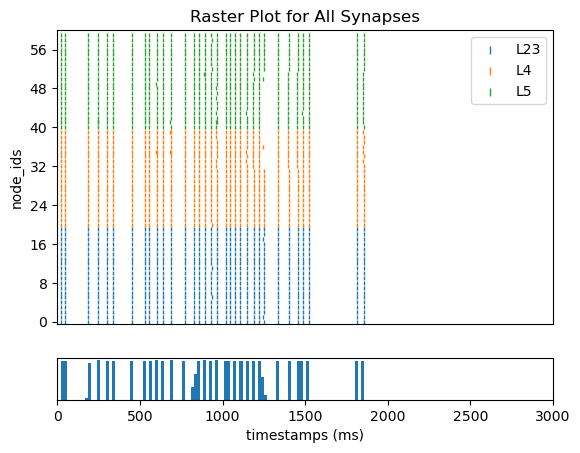

In [17]:
_ = plot_raster(
    config_file="config.lfp.json",
    spikes_file="output_allsynapses/spikes.csv",
    title="Raster Plot for All Synapses",
    group_by="layer",
)

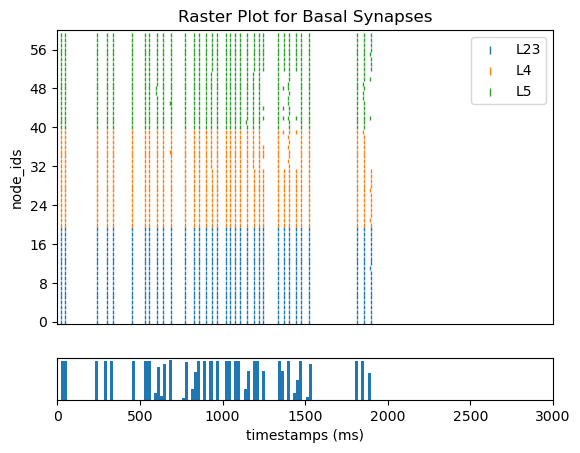

In [26]:
_ = plot_raster(
    config_file="config.lfp_basal.json",
    spikes_file="output_basalsynapses/spikes.csv",
    title="Raster Plot for Basal Synapses",
    group_by="layer",
)

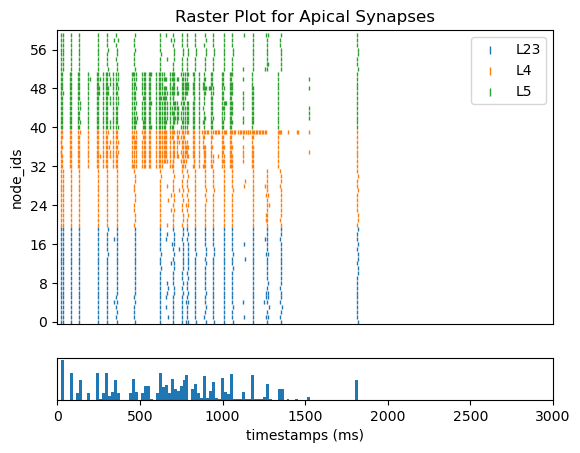

In [27]:
_ = plot_raster(
    config_file="config.lfp_apical.json",
    spikes_file="output_apicalsynapses/spikes.csv",
    title="Raster Plot for Apical Synapses",
    group_by="layer",
)

Plot the LFPs:

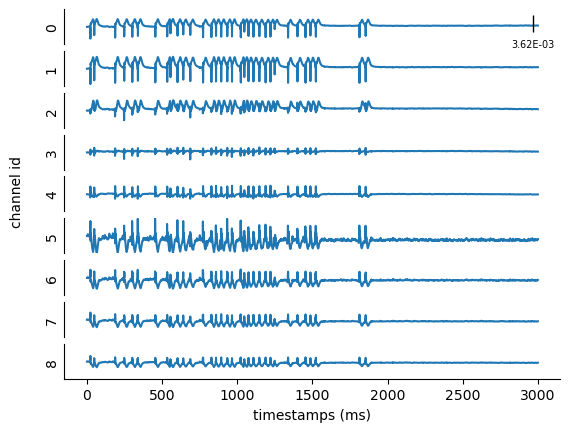

In [18]:
from bmtk.analyzer.ecp import plot_ecp

_ = plot_ecp(config_file="config.lfp.json", report_name="cortical_electrode")

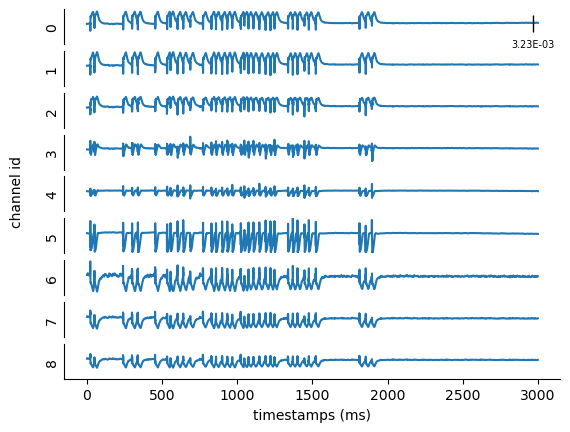

In [28]:
_ = plot_ecp(config_file="config.lfp_basal.json", report_name="cortical_electrode")

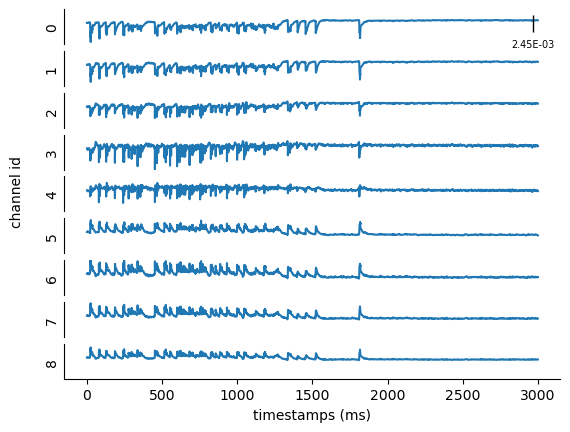

In [29]:
_ = plot_ecp(config_file="config.lfp_apical.json", report_name="cortical_electrode")

### 5. Calculate the CSD:
- Calculate the CSD from the simulated LFPs using the delta-iCSD method. You can find the implementation of the delta-iCSD method in the [icsd_scripts](icsd_scripts) folder.

In [30]:
import sys
import quantities as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("icsd_scripts/")

import icsd

from get_csd_input_dict import get_csd_input_dict

delta_icsd_allsynapses = get_csd_input_dict(
    "output_allsynapses/cortical_electrode.h5",
)
delta_icsd_basal = get_csd_input_dict(
    "output_basalsynapses/cortical_electrode.h5",
)
delta_icsd_apical = get_csd_input_dict(
    "output_apicalsynapses/cortical_electrode.h5",
)

In [31]:
csd_dict = dict(
    delta_icsd=icsd.DeltaiCSD(**delta_icsd_allsynapses),
    delta_icsd_basal=icsd.DeltaiCSD(**delta_icsd_basal),
    delta_icsd_apical=icsd.DeltaiCSD(**delta_icsd_apical),
)

csd_raw = {"delta_icsd": [], "delta_icsd_basal": [], "delta_icsd_apical": []}
csd_smooth = {"delta_icsd": [], "delta_icsd_basal": [], "delta_icsd_apical": []}
# Iterate through the csd_dict and compute raw and smoothed CSD

for method, csd_obj in list(csd_dict.items()):
    csd_raw[method] = csd_obj.get_csd()  # num_channels x trial_duration
    csd_smooth[method] = csd_obj.filter_csd(
        csd_raw[method]
    )  # num_channels x trial_duration

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ], 
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ], 
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ], 
a = [ 2.213 ]


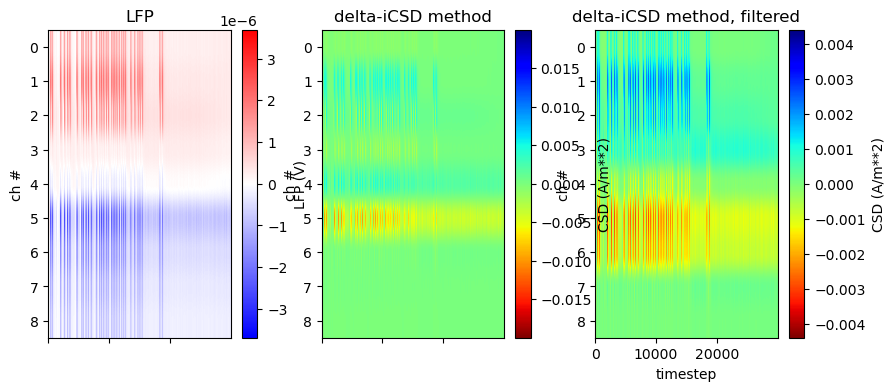

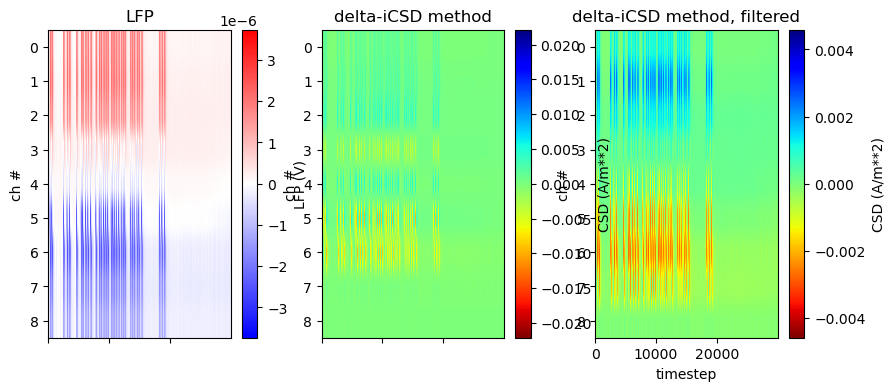

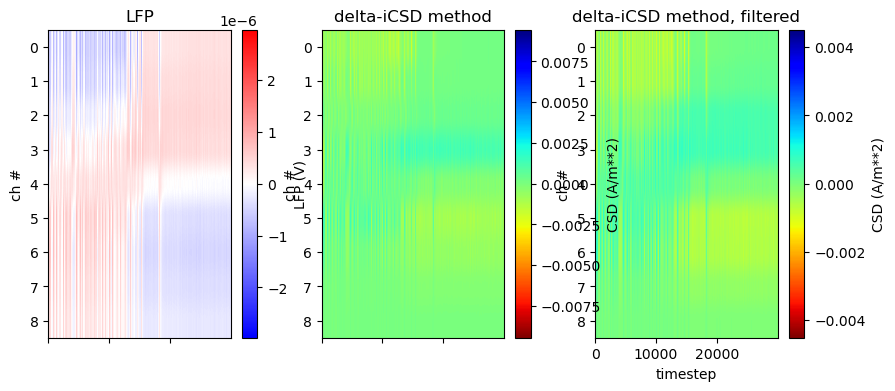

In [32]:
import matplotlib.pyplot as plt

delta_icsd_dict = dict(
    delta_icsd=delta_icsd_allsynapses,
    delta_icsd_basal=delta_icsd_basal,
    delta_icsd_apical=delta_icsd_apical,
)

for method, csd_smooth in list(csd_smooth.items()):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    lfp_data = delta_icsd_dict[method]["lfp"]

    # plot LFP signal
    ax = axes[0]
    im = ax.imshow(
        np.array(lfp_data),
        origin="upper",
        vmin=-abs(lfp_data).max(),
        vmax=abs(lfp_data).max(),
        cmap="bwr",
    )
    ax.axis(ax.axis("tight"))
    cb = plt.colorbar(im, ax=ax)
    cb.set_label("LFP (%s)" % lfp_data.dimensionality.string)
    ax.set_xticklabels([])
    ax.set_title("LFP")
    ax.set_ylabel("ch #")

    # plot raw csd estimate
    ax = axes[1]
    im = ax.imshow(
        np.array(csd_raw[method]),
        origin="upper",
        vmin=-abs(csd_raw[method]).max(),
        vmax=abs(csd_raw[method]).max(),
        cmap="jet_r",
    )
    ax.axis(ax.axis("tight"))
    ax.set_title(csd_obj.name)
    cb = plt.colorbar(im, ax=ax)
    cb.set_label("CSD (%s)" % csd_raw[method].dimensionality.string)
    ax.set_xticklabels([])
    ax.set_ylabel("ch #")

    # plot spatially filtered csd estimate
    ax = axes[2]
    im = ax.imshow(
        np.array(csd_smooth),
        origin="upper",
        vmin=-abs(csd_smooth).max(),
        vmax=abs(csd_smooth).max(),
        cmap="jet_r",
    )
    ax.axis(ax.axis("tight"))
    ax.set_title(csd_obj.name + ", filtered")
    cb = plt.colorbar(im, ax=ax)
    cb.set_label("CSD (%s)" % csd_smooth.dimensionality.string)
    ax.set_ylabel("ch #")
    ax.set_xlabel("timestep")